### Python + MySQL

#### Objetivo

Criar um projeto onde seja possível utilizar ambos os recursos do MySQL e da linguagem Python.

#### Base de dados

Esta base de dados consiste em notas obtidas por alunos em várias disciplinas. Nela estão inclusas pontuações em três exames e uma variedade de fatores pessoais, sociais e econômicos que podem ter efeitos de interação sobre eles.

    Atributos:
- <u>gender</u>: sexo biológico ('female' ou 'male');
- <u>race/ethnicity</u>: etnia ('group A', 'group B', 'group C', 'group D' ou 'group E');
- <u>parental level of education</u>: escolaridade dos pais ('bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school' ou 'some high school');
- <u>lunch</u>: tipo de almoço ('standard' ou 'free/reduced');
- <u>test preparation course</u>: curso de preparação para o teste ('none' ou 'completed');
- <u>math score</u>: nota no teste de matemática (valor inteiro de 0 a 100);
- <u>reading score</u>: nota no teste de leitura (valor inteiro de 0 a 100);
- <u>writing score</u>: nota no teste de escrita (valor inteiro de 0 a 100).

Esta é uma base de dados fictícia e deve ser usada apenas para fins educacionais.

Disponível em: https://www.kaggle.com/spscientist/students-performance-in-exams

#### Resultados

A ideia deste documento é mostrar as funcionalidades das duas ferramentas trabalhando juntas. Para efeito de aprendizado, serão levantadas algumas questões entendidas como relevantes e em seguida serão apresentados possíveis gráficos que podem contribuir na resposta de cada uma delas, seguidos de uma breve discussão.

    Questões levantadas:

1. Qual a média e desvio padrão das notas dos 3 exames de acordo com a escolaridade dos pais dos alunos?

2. Considerando a média de aprovação como 70, quantos alunos foram aprovados em todas disciplinas? Destes, qual a porcentagem de quem fez curso preparatório?

3. O tipo de almoço do aluno pode ser considerado um fator que contribui para os resultados dos testes?

#### Sobre a biblioteca mysql.connector

MySQL connector é desenvolvido pelo grupo MySQL na Oracle, escrito inteiramente em Python.

#### Referências
Python and MySQL Database: A Practical Introduction - https://realpython.com/python-mysql/#comparing-mysql-to-other-sql-databases

Getting Started with MySQL in Python - https://www.datacamp.com/community/tutorials/mysql-python

MySQL Connector/Python Developer Guide - https://dev.mysql.com/doc/connector-python/en/connector-python-introduction.html

Python MySQL Database Connection using MySQL Connector - https://pynative.com/python-mysql-database-connection/#h-how-to-connect-mysql-database-in-python


#### Importar bibliotecas

In [3]:
import mysql.connector                  # conexão com mysql
from mysql.connector import errorcode   # importa as possíveis mensagens de erro
import matplotlib.pyplot as plt         # criação de gráficos e visualizações de dados em geral
import numpy as np                      # realizar cálculos em arrays multidimensionais
import pandas as pd                     # manipulação e análise de dados

# a saída dos comandos de plotagem é exibida diretamente abaixo da célula
%matplotlib inline

#### Abrir conexão com o mysql

In [4]:
# definição das variáveis necessárias para conexão com o mysql
host = "localhost"
user = "root"
password = ""
port = 3306


# tentativa de conexão, caso não seja possível, uma mensagem aparece informando o erro
try:
    con = mysql.connector.connect(host=host, user=user, passwd=password, port=port)
    
except mysql.connector.Error as err:
    print("Não foi possível abrir conexão com o mysql. Erro apresentado: \n {}".format(err))

#### Criar database

Antes, testar se já existe uma base de dados com o nome escolhido

Obs: uma base de dados já conhecida pode ser adicionada como argumento na abertura de conexão com o mysql

In [9]:
# definir nome da base de dados
database_name = "school"

# um objeto 'cursor' é necessário para se comunicar com o mysql e, assim, executar instruções
cursor = con.cursor(buffered=True)

# o método execute() roda um query e retorna o seu resultado
cursor.execute("CREATE DATABASE IF NOT EXISTS {}".format(database_name)) 

# definir a base de dados a ser utilizada ao longo desse projeto
cursor.execute("USE {}".format(database_name)) 

cursor.close();

#### Criar tabela

In [10]:
# definir nome da tabela
table_name = "studentsperformance"

# criar um objeto 'cursor'
with con.cursor(buffered=True) as cursor:
    # comando para criar tabela
    cursor.execute("""CREATE TABLE IF NOT EXISTS {} 
               (gender VARCHAR(6), 
                race_ethnicity VARCHAR(7), 
                parental_level_of_education VARCHAR(18), 
                lunch VARCHAR(12), 
                test_preparation_course VARCHAR(9), 
                math_score INT, 
                reading_score INT, 
                writing_score INT)""".format(table_name))

#### Inserir dados na tabela

A base de dados original conta com 1000 linhas, mas neste projeto só serão carregados os primeiros 100 registros.

In [11]:
# definir query
query = "INSERT INTO studentsperformance VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"

# colocar em uma variável todos os valores a serem adicionados
values = [
    ('female','group B','bachelor''s degree','standard','none',72,72,74),
    ('female','group C','some college','standard','completed',69,90,88),
    ('female','group B','master''s degree','standard','none',90,95,93),
    ('male','group A','associate''s degree','free/reduced','none',47,57,44),
    ('male','group C','some college','standard','none',76,78,75),
    ('female','group B','associate''s degree','standard','none',71,83,78),
    ('female','group B','some college','standard','completed',88,95,92),
    ('male','group B','some college','free/reduced','none',40,43,39),
    ('male','group D','high school','free/reduced','completed',64,64,67),
    ('female','group B','high school','free/reduced','none',38,60,50),
    ('male','group C','associate''s degree','standard','none',58,54,52),
    ('male','group D','associate''s degree','standard','none',40,52,43),
    ('female','group B','high school','standard','none',65,81,73),
    ('male','group A','some college','standard','completed',78,72,70),
    ('female','group A','master''s degree','standard','none',50,53,58),
    ('female','group C','some high school','standard','none',69,75,78),
    ('male','group C','high school','standard','none',88,89,86),
    ('female','group B','some high school','free/reduced','none',18,32,28),
    ('male','group C','master''s degree','free/reduced','completed',46,42,46),
    ('female','group C','associate''s degree','free/reduced','none',54,58,61),
    ('male','group D','high school','standard','none',66,69,63),
    ('female','group B','some college','free/reduced','completed',65,75,70),
    ('male','group D','some college','standard','none',44,54,53),
    ('female','group C','some high school','standard','none',69,73,73),
    ('male','group D','bachelor''s degree','free/reduced','completed',74,71,80),
    ('male','group A','master''s degree','free/reduced','none',73,74,72),
    ('male','group B','some college','standard','none',69,54,55),
    ('female','group C','bachelor''s degree','standard','none',67,69,75),
    ('male','group C','high school','standard','none',70,70,65),
    ('female','group D','master''s degree','standard','none',62,70,75),
    ('female','group D','some college','standard','none',69,74,74),
    ('female','group B','some college','standard','none',63,65,61),
    ('female','group E','master''s degree','free/reduced','none',56,72,65),
    ('male','group D','some college','standard','none',40,42,38),
    ('male','group E','some college','standard','none',97,87,82),
    ('male','group E','associate''s degree','standard','completed',81,81,79),
    ('female','group D','associate''s degree','standard','none',74,81,83),
    ('female','group D','some high school','free/reduced','none',50,64,59),
    ('female','group D','associate''s degree','free/reduced','completed',75,90,88),
    ('male','group B','associate''s degree','free/reduced','none',57,56,57),
    ('male','group C','associate''s degree','free/reduced','none',55,61,54),
    ('female','group C','associate''s degree','standard','none',58,73,68),
    ('female','group B','associate''s degree','standard','none',53,58,65),
    ('male','group B','some college','free/reduced','completed',59,65,66),
    ('female','group E','associate''s degree','free/reduced','none',50,56,54),
    ('male','group B','associate''s degree','standard','none',65,54,57),
    ('female','group A','associate''s degree','standard','completed',55,65,62),
    ('female','group C','high school','standard','none',66,71,76),
    ('female','group D','associate''s degree','free/reduced','completed',57,74,76),
    ('male','group C','high school','standard','completed',82,84,82),
    ('male','group E','some college','standard','none',53,55,48),
    ('male','group E','associate''s degree','free/reduced','completed',77,69,68),
    ('male','group C','some college','standard','none',53,44,42),
    ('male','group D','high school','standard','none',88,78,75),
    ('female','group C','some high school','free/reduced','completed',71,84,87),
    ('female','group C','high school','free/reduced','none',33,41,43),
    ('female','group E','associate''s degree','standard','completed',82,85,86),
    ('male','group D','associate''s degree','standard','none',52,55,49),
    ('male','group D','some college','standard','completed',58,59,58),
    ('female','group C','some high school','free/reduced','none',0,17,10),
    ('male','group E','bachelor''s degree','free/reduced','completed',79,74,72),
    ('male','group A','some high school','free/reduced','none',39,39,34),
    ('male','group A','associate''s degree','free/reduced','none',62,61,55),
    ('female','group C','associate''s degree','standard','none',69,80,71),
    ('female','group D','some high school','standard','none',59,58,59),
    ('male','group B','some high school','standard','none',67,64,61),
    ('male','group D','some high school','free/reduced','none',45,37,37),
    ('female','group C','some college','standard','none',60,72,74),
    ('male','group B','associate''s degree','free/reduced','none',61,58,56),
    ('female','group C','associate''s degree','standard','none',39,64,57),
    ('female','group D','some college','free/reduced','completed',58,63,73),
    ('male','group D','some college','standard','completed',63,55,63),
    ('female','group A','associate''s degree','free/reduced','none',41,51,48),
    ('male','group C','some high school','free/reduced','none',61,57,56),
    ('male','group C','some high school','standard','none',49,49,41),
    ('male','group B','associate''s degree','free/reduced','none',44,41,38),
    ('male','group E','some high school','standard','none',30,26,22),
    ('male','group A','bachelor''s degree','standard','completed',80,78,81),
    ('female','group D','some high school','standard','completed',61,74,72),
    ('female','group E','master''s degree','standard','none',62,68,68),
    ('female','group B','associate''s degree','standard','none',47,49,50),
    ('male','group B','high school','free/reduced','none',49,45,45),
    ('male','group A','some college','free/reduced','completed',50,47,54),
    ('male','group E','associate''s degree','standard','none',72,64,63),
    ('male','group D','high school','free/reduced','none',42,39,34),
    ('female','group C','some college','standard','none',73,80,82),
    ('female','group C','some college','free/reduced','none',76,83,88),
    ('female','group D','associate''s degree','standard','none',71,71,74),
    ('female','group A','some college','standard','none',58,70,67),
    ('female','group D','some high school','standard','none',73,86,82),
    ('female','group C','bachelor''s degree','standard','none',65,72,74),
    ('male','group C','high school','free/reduced','none',27,34,36),
    ('male','group C','high school','standard','none',71,79,71),
    ('male','group C','associate''s degree','free/reduced','completed',43,45,50),
    ('female','group B','some college','standard','none',79,86,92),
    ('male','group C','associate''s degree','free/reduced','completed',78,81,82),
    ('male','group B','some high school','standard','completed',65,66,62),
    ('female','group E','some college','standard','completed',63,72,70),
    ('female','group D','some college','free/reduced','none',58,67,62),
    ('female','group D','bachelor''s degree','standard','none',65,67,62)
]

# criar um objeto 'cursor'
with con.cursor(buffered=True) as cursor:
    # executar comando para inserir dados
    cursor.executemany(query, values)

    # envia uma instrução commit para o servidor mysql, confirmando a transação atual
    con.commit()

#### Possíveis modificações que podem ser feitas na tabela

##### 1. Garantir que as informações adicionadas condizem com o esperado

Exemplo: adicionar restrição para as notas (valor inserido deve estar entre 0 e 100)

In [12]:
# definir query que adiciona restrição
query = """ALTER TABLE {} 
        ADD CONSTRAINT score_limits 
        CHECK(math_score>=0 AND math_score<=100)""".format(table_name)

# criar um objeto 'cursor'
with con.cursor(buffered=True) as cursor:
    # tenta executar comando
    try:
        cursor.execute(query)
        con.commit()
    except mysql.connector.Error as err:
        print("Não foi possível alterar a tabela. Erro apresentado: \n {}".format(err))

# ------------------------

# definir query que tenta modificar uma tupla para math_score>100
query = "UPDATE {} SET math_score=101 WHERE math_score=0".format(table_name)

# criar um objeto 'cursor'
with con.cursor(buffered=True) as cursor:
    # tenta executar comando
    try:
        cursor.execute(query)
        con.commit()
    except mysql.connector.Error as err:
        print("Não foi possível alterar o valor do atributo. Erro apresentado: \n {}".format(err))

Não foi possível alterar o valor do atributo. Erro apresentado: 
 3819 (HY000): Check constraint 'score_limits' is violated.


##### 2. Alterar o tipo de dados de algum atributo visando otimização

Exemplo: como a nota varia entre 0 e 100, o atributo pode ser do tipo TINYINT (ocupando menos espaço que o tipo INT)

Obs: apenas está sendo modificado o atributo 'math_score'

In [13]:
# criar um objeto 'cursor'
with con.cursor(buffered=True) as cursor:
    
    # ------------------------ antes de modificar

    # definir e executar query para ver todos os atributos e seus respectivos tipos
    query = """SELECT COLUMN_NAME, DATA_TYPE 
        FROM INFORMATION_SCHEMA.COLUMNS 
        WHERE table_schema = '{}' AND table_name = '{}'""".format(database_name, table_name) 
    cursor.execute(query)

    # mostrar atributos + tipo
    result = cursor.fetchall()
    print("Antes:")
    for x in result:
      print(x)
   
    
    # ------------------------ modificar tipo do atributo 

    # definir e executar query
    query = "ALTER TABLE {} MODIFY COLUMN math_score TINYINT".format(table_name)
    try:
        cursor.execute(query)
        con.commit()
    except mysql.connector.Error as err:
        print("Não foi possível alterar a tabela. Erro apresentado: \n {}".format(err))
    

    # ------------------------ após modificar

    # definir e executar query para ver todos os atributos e seus respectivos tipos
    query = """SELECT COLUMN_NAME, DATA_TYPE 
            FROM INFORMATION_SCHEMA.COLUMNS 
            WHERE table_schema = '{}' AND table_name = '{}'""".format(database_name, table_name)
    cursor.execute(query)

    # mostrar atributos + tipo
    result = cursor.fetchall()
    print("\nDepois:")
    for x in result:
      print(x)

Antes:
('gender', 'varchar')
('lunch', 'varchar')
('math_score', 'int')
('parental_level_of_education', 'varchar')
('race_ethnicity', 'varchar')
('reading_score', 'int')
('test_preparation_course', 'varchar')
('writing_score', 'int')

Depois:
('gender', 'varchar')
('lunch', 'varchar')
('math_score', 'tinyint')
('parental_level_of_education', 'varchar')
('race_ethnicity', 'varchar')
('reading_score', 'int')
('test_preparation_course', 'varchar')
('writing_score', 'int')


#### Respostas das questões

Nesta parte será usada o comando "read_sql" da biblioteca pandas, essa função é capaz de armazenar o resultado de uma consulta SQL em um DataFrame

Mais detalhes: https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html

##### 1. Qual a média e desvio padrão das notas dos 3 exames de acordo com a escolaridade dos pais dos alunos?

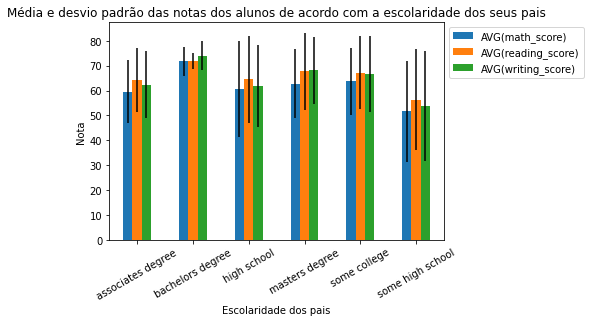

In [14]:
# definir query
query = """SELECT parental_level_of_education, 
        AVG(math_score), AVG(reading_score), AVG(writing_score),
        STD(math_score), STD(reading_score), STD(writing_score)
        FROM studentsperformance
        GROUP BY parental_level_of_education
        ORDER BY parental_level_of_education"""


# executar comando e armazenar resultado
result = pd.read_sql(query, con)


# para usar o parâmetro yerr, se faz necessário uma modificação na estrutura do data frame
# mais detalhes sobre:
# https://stackoverflow.com/questions/23144784/plotting-error-bars-on-grouped-bars-in-pandas
# https://stackoverflow.com/questions/23000418/adding-error-bars-to-grouped-bar-plot-in-panda
yerr = result[['STD(math_score)','STD(reading_score)','STD(writing_score)']].to_numpy().T


# visualizar resultado
result.plot(kind = 'bar', 
            x = "parental_level_of_education", 
            y = ["AVG(math_score)", "AVG(reading_score)", "AVG(writing_score)"],
            yerr = yerr)


# configurações do plot
plt.title("Média e desvio padrão das notas dos alunos de acordo com a escolaridade dos seus pais")
plt.xlabel("Escolaridade dos pais")
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel("Nota")
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

### Discussão - Questão 1

As médias das notas dos alunos com os pais de maior grau de escolaridade (*masters degree*) estão próximas dos outros alunos, sendo um pouco maior do que aqueles de pais com *high school* e um pouco menor do que aqueles de pais com *bachelors degree*. Ou seja, um maior grau de escolaridade dos pais do aluno não necessariamente implica em uma melhor nota nos exames. 

Por outro lado, os alunos com os pais de menor grau de escolaridade (*some high school*) são os que apresentam menor média nos três exames. Qualquer afirmação em cima dessa informação necessita de verificação por análise estatística, além de considerações de influência de outros fatores, exemplo: sociais e econômicos.


##### 2. Considerando a média de aprovação como 70, quantos alunos foram aprovados em todas disciplinas? Destes, qual a porcentagem de quem fez curso preparatório?

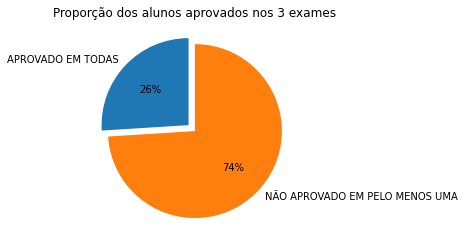

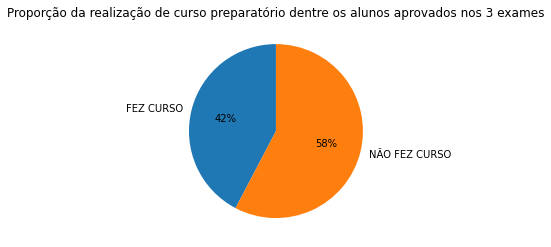

In [17]:
# definir nota de aprovação
media = 70


# computar total de registros
total = pd.read_sql("""SELECT COUNT(*) FROM studentsperformance""", con) 
total = total.iloc[0][0]


# definir query - alunos aprovados nos 3 exames, de acordo com o curso preparatório
query = """SELECT test_preparation_course, COUNT(*)
        FROM studentsperformance
        WHERE math_score>= {} AND reading_score>= {} AND writing_score>= {}
        GROUP BY test_preparation_course
        ORDER BY test_preparation_course
        """.format(media, media, media)


# executar comando e armazenar resultado
result = pd.read_sql(query, con)


# extrair total de alunos que se aplicam na condição
total_fez_curso = result['COUNT(*)'].sum()


# ------------------------ plot 1: Proporção dos alunos aprovados nos 3 exames

# definições para o plot
y = [total_fez_curso, total-total_fez_curso]
legenda1 = ['APROVADO EM TODAS', 'NÃO APROVADO EM PELO MENOS UMA']
explode = (0.1, 0)

plt.pie(y, autopct='%1.0f%%', labels=legenda1, startangle=90, explode=explode)
plt.title("Proporção dos alunos aprovados nos 3 exames")


# ------------------------ plot 2: Aprovação por realização de curso preparatório

# definições para o plot
legenda2 = ['FEZ CURSO', 'NÃO FEZ CURSO']

result.plot(kind='pie', y="COUNT(*)", autopct='%1.0f%%', labels=legenda2, legend = None, startangle=90)
plt.title("Proporção da realização de curso preparatório dentre os alunos aprovados nos 3 exames")
plt.ylabel("")



plt.show()

### Discussão - Questão 2

Do total, 26% dos alunos foram aprovados nos três exames. Desses, apenas 42% fizeram o curso preparatório. Ou seja, de modo geral, a realização de um curso preparatório não é um bom fator para relacionar à aprovação dos exames, já que a minoria daqueles aprovados fizeram o curso.

##### 3. O tipo de almoço do aluno pode ser considerado um fator que contribui para os resultados dos testes?

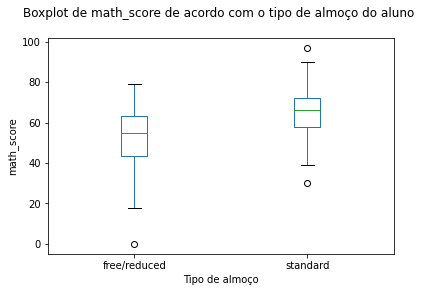

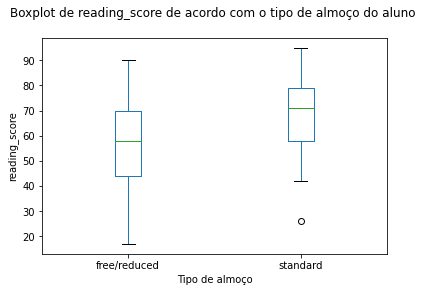

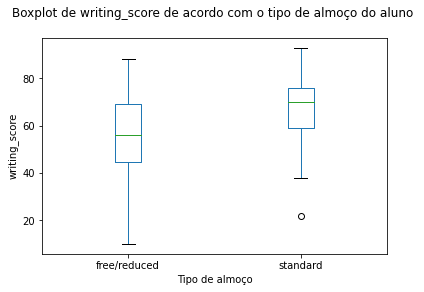

In [10]:
# definir query
query = """SELECT lunch, math_score, reading_score, writing_score
        FROM studentsperformance
        ORDER BY lunch"""

# executar comando e armazenar resultado
result = pd.read_sql(query, con)



# ------------------------ plot 1: visualizar resultado para math_score
result.boxplot(column="math_score", by="lunch", grid=False)

# configurações do plot 1
plt.title("Boxplot de math_score de acordo com o tipo de almoço do aluno \n")
plt.suptitle('')
plt.xlabel("Tipo de almoço")
plt.ylabel("math_score")


# ------------------------ plot 2: visualizar resultado para reading_score
result.boxplot(column="reading_score", by="lunch", grid=False)

# configurações do plot 2
plt.title("Boxplot de reading_score de acordo com o tipo de almoço do aluno \n")
plt.suptitle('')
plt.xlabel("Tipo de almoço")
plt.ylabel("reading_score")


# ------------------------ plot 3: visualizar resultado para writing_score
result.boxplot(column="writing_score", by="lunch", grid=False)

# configurações do plot 3
plt.title("Boxplot de writing_score de acordo com o tipo de almoço do aluno \n")
plt.suptitle('')
plt.xlabel("Tipo de almoço")
plt.ylabel("writing_score")



plt.show()

### Discussão - Questão 3

Enquanto a mediana das notas nos três exames dos alunos que possuem *free/reduced* como tipo de almoço se encontra entre 50 e 60, pelo menos 75% (ver primeiro quartil) dos alunos com almoço *standard* possuem nota acima desse valor.

Então, o tipo de almoço pode ser um fator a ser considerado na análise da performance dos alunos nos exames.

### Discussão Final

Os resultados obtidos levantam interessantes discussões sobre o que pode influenciar na performance dos alunos nos exames, como fatores sociais, econômicos e familiares. Porém, para maiores afirmações, se fazem necessárias outras análises estatísticas para comparar a relevância das diferentes observações. 

Atendo-se ao objetivo de mostrar as funcionalidades do Python e MySQL em conjunto, essas discussões não serão continuadas nesse projeto.

#### Autor: Pedro Lima, em jan/2022

LinkedIn: https://www.linkedin.com/in/pedro-vitorlima/

Github: https://github.com/peuvitor